In [76]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.stem.porter import *
import string
from collections import defaultdict
from nltk.corpus import stopwords
import math
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Andrew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Question 1: Readings

* (1a) What is the question that the authors tried to answer?
    * What is the purpose of the censorship program conducted in China? Or more directly, is the purpose of the censorship program
    to reduce the probability of collective action?
* (1b) Briefly explain how the authors collected the data. What are the strengths and weakness of their data?
    * The researchers collected data from social media blogs, notinf that a large majority of the data is not from only large sites, but smaller individual sites.
    The hardest part for the researchers was finding all of these sites and getting proper access to the data. They acquired media posts from 1382 Chinese websites.
    In total, about 3674698 posts with 127283 randomly selected for their further analysis. The main limitation/weakness of their data is that it does not take
     into account any of the lost posts from firewalling/search limitations. Nor does it also take into account any form of censorship in person.
* (1c) What machine learning algorithms did the authors use in this paper? In 1-2 paragraphs, explain the methodology of this paper.
    * The authors seem to use a form of clustering and term frequency analysis based on the events found. What they first did regarding clustering was
    organize the posts into 85 topic areas by keyword. They used burst detection to determine which keywords were most likely to occur and when, which ended up with
    a 87/67 volume bursts/topic areas. Then, they classified the events into collective action potential, criticism of the censors, pornography, government, and other news.
     The events would be categorized into these 5 and the accuracy of this method was checked by 2 independent coders who showed a 98.9%$ agreement with the results from their
     own classification.
* (1d) What does Figure 4 in this paper tell us? How does it relate to the question that the authors are trying to answer?
    * Figure 4 shows us the specific events with the highest and lowest censorship magnitude, explaining that highly censored events are not criticisms of national policies, but more
    localized collective expressions that represent or threaten group formation. This is extremely relevant to answering the question of the purpose of the chinese
    censorhip program, as it shows the events most likely to be censored are the ones most likely to lead to collective action.
* (1e) What do Figures 8 and 9 in this paper tell us? How does it relate to the question that the authors are trying to answer?
    * Figure 8 shows us the percent of posts censored that either criticized or support the state, while figure 9 shows us the percent of posts
    censored that are more related to collective action events or not, sorted into categories on whether the comments support or criticize the state.
    These shows us that the percentage of censorship is not correlated to whether one supports or does not support the state, but rather if the comments
    run the risk of collective action. Regardless of political support, the comment will be removed if it risks movements toward social action. This further
    supports the question if the purpose of the censorship program is to reduce the probability of collective action.

In [77]:
trump2016 = pd.read_csv("trump2016.csv")
clinton2016 = pd.read_csv("clinton2016.csv")

2a. Pre-process the tweets
    * converting to lower cases
    * removing stopwords (from nltk.corpus import stopwords)
    * stemmingthewords(PorterStemmer()

What are the top words in Trump’s tweets?
What are the least common words in Trump’s tweets?

In [78]:
#Taking the column of texts into a new var named texts
trumptexts = trump2016["text"]
clintontexts = clinton2016["text"]

In [79]:
#Checking trump texts
trumptexts

0         Here is my statement.pic.twitter.com/WAZiGoQqMQ
1       Is this really America? Terrible!pic.twitter.c...
2       The media and establishment want me out of the...
3       Wow, @CNN Town Hall questions were given to Cr...
4       Debate polls look great - thank you!\n#MAGA #A...
                              ...                        
8434    "@noahshappy: @realDonaldTrump very true comme...
8435    "@MeleMallory: @realDonaldTrump You know it's ...
8436    "@ScreenPlayWritr: @realDonaldTrump Is Al Gore...
8437    This very expensive GLOBAL WARMING bullshit ha...
8438    Today is the first day of the rest of your lif...
Name: text, Length: 8439, dtype: object

In [80]:
#Creating dictionary and zeroed integer for use in the for loops
trumpwordcount = defaultdict(int)
clintonwordcount = defaultdict(int)
trumptotalwords = 0
clintontotalwords = 0
trumptweetclean = []

In [81]:
punct = string.punctuation #Creating list of unwanted chars (punctuation that need to be removed)
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [82]:
#Added this section in to help with 3c formatting
tweetcolumns = ["text", "wordcount"]

In [83]:
templist = []
tmpstring = str(0)
tempwordcount = 0

In [84]:
tweetwordtrumpcount = pd.DataFrame(columns=tweetcolumns)
for text in trumptexts:
    text = text.lower() #Converting text into lowercase
    text = [character for character in text if not (character in punct)] #Checking for punctuation
    #Grabbing every single letter for every text (tweet)
    text = ''.join(text) #Will form each character back into words (String)
    words = text.strip().split() #Token conversion!
    #Strips spaces outside of words and split words into single "word"
    words = [word for word in words if not (word in stop_words)]
#Loop for removing punctuation using stemmer (nested within lowercase loop)
    for word in words:
        word = stemmer.stem(word)
        #Can now increment
        trumptotalwords += 1
        trumpwordcount[word] += 1
        tempwordcount += 1
    #Can append fixed phrases to dataframe plus adding word counts
    #This section to the loop was added to make 2c much easier
    tempstr = ' '.join(words)
    templist = [[tempstr, tempwordcount]]
    tempdf = pd.DataFrame(data = templist, columns=tweetcolumns)
    tweetwordtrumpcount = tweetwordtrumpcount.append(tempdf, ignore_index=True)
    tempwordcount = 0

In [85]:
tweetwordtrumpcount.head()

,text,wordcount
0,statementpictwittercomwazigoqqmq,1
1,really america terriblepictwittercomwiwc61pifu,3
2,media establishment want race badly never drop...,12
3,wow cnn town hall questions given crooked hill...,17
4,debate polls look great thank maga americafirs...,7


In [86]:
#Appending trump's word count to a y x 2 list
trumpwordcountlist = []

for word in trumpwordcount:
    trumpwordcountlist.append([trumpwordcount[word], word])

#Now we can index/slice into this list and see the frequency of each word
#trumpwordcountlist[0::]
#Won't let this run for obvious reasons (too long)
#Will need to organize based on frequency or simply call based on the number amount

In [87]:
#trumpwordcountlist
#Checking trumptexts tp see if it worked
#This took me forever to fix, I had to recompare my notes and I found that
#The "word=" piece of the code in the loop was missing

In [88]:
#Sorting count by frequency - Most common
sortedtrumpwordcount = [(trumpwordcount[w], w) for w in trumpwordcount]
sortedtrumpwordcount.sort(reverse=True)
sortedtrumpwordcount[:5] #Displaying the 5 most common words

[(1900, 'realdonaldtrump'),
 (1286, 'trump'),
 (1100, 'great'),
 (796, 'presid'),
 (751, 'thank')]

In [89]:
#Doing the same processing for clinton texts + resetting temps
templist = []
tmpstring = str(0)
tempwordcount = 0
tweetwordclintoncount = pd.DataFrame(columns=tweetcolumns)
for text in clintontexts:
    text = text.lower() #Converting text into lowercase
    text = [character for character in text if not (character in punct)] #Checking for punctuation
    #Grabbing every single letter for every text (tweet)
    text = ''.join(text) #Will form each character back into words (String)
    words = text.strip().split() #Token conversion!
    #Strips spaces outside of words and split words into single "word"
    words = [word for word in words if not (word in stop_words)]
#Loop for removing punctuation using stemmer (nested within lowercase loop)
    for word in words:
        word = stemmer.stem(word)
        #Can now increment
        clintontotalwords += 1
        clintonwordcount[word] += 1

    tempstr = ' '.join(words)
    templist = [[tempstr, tempwordcount]]
    tempdf = pd.DataFrame(data = templist, columns=tweetcolumns)
    tweetwordclintoncount = tweetwordclintoncount.append(tempdf, ignore_index=True)
    tempwordcount = 0

In [90]:
tweetwordclintoncount.head()

,text,wordcount
0,remember debatepictwittercomrlmbtt5wwy,0
1,httphrcio2dqkjip debatepictwittercomc4mp8cponf,0
2,lets go debatepictwittercomhd3zvj9xl8,0
3,everyone knows bright resilient buttheyre goin...,0
4,progress weve made last 8 years ballot —potus ...,0


In [91]:
#Appending trump's word count to a y x 2 list
clintonwordcountlist = []

for word in clintonwordcount:
   clintonwordcountlist.append([clintonwordcount[word], word])

In [92]:
sortedclintonwordcount = [(clintonwordcount[w], w) for w in clintonwordcount]
sortedclintonwordcount.sort(reverse=True)

In [93]:
print("The total amount of words in 2016: \nfor trump = " + str(trumptotalwords) + "\nfor clinton: " + str(clintontotalwords))
#Printing total words of both candidates
print("\nThe top 5 words in 2016 for trump: \n" + str(sortedtrumpwordcount[0:5:1]) + "\nThe bottom 5 words in 2016 for trump: \n" + str(sortedtrumpwordcount[:-6:-1]))
#Will not check the dictionary, it takes up way too space in the output

The total amount of words in 2016: 
for trump = 92224
for clinton: 32975

The top 5 words in 2016 for trump: 
[(1900, 'realdonaldtrump'), (1286, 'trump'), (1100, 'great'), (796, 'presid'), (751, 'thank')]
The bottom 5 words in 2016 for trump: 
[(1, '03052014'), (1, '0306'), (1, '061615'), (1, '07'), (1, '0745')]


Question 2b
How many times does the word great occur in Clinton’s tweets? What about bias, fake, and love?

In [94]:
#Creating dataframe to find word counts easily by word
columnnames = ["count", "word"]
trumpwordcountdata = pd.DataFrame(data = sortedtrumpwordcount, columns=columnnames)
clintonwordcountdata = pd.DataFrame(data = sortedclintonwordcount, columns=columnnames)

In [95]:
#Finding the words in clintonwordcountdata
wordfind = ["great", "bias", "fake", "love"]
clintonwordcountdata[clintonwordcountdata.word.isin(wordfind)]

,count,word
60,71,love
63,70,great
5886,1,fake


Question 2c
* First, let’s compute term frequency. For each document d and term t, the term frequency (tf)

In [96]:
#Creating rough computation for term frequency
#termfrequency = (count term in doc) / (wordnum in doc)
#Need to find doc
    #Loop in doc to find term count and wordnum in doc total
#Testing with example

In [97]:
#Brainstorming
#Need to iterate through each row and store a value per row
#Will need a loop and a spare list to save word counts


#index = trumptexts.index
#numrows = len(index)

In [98]:
def tweetwordcountermini(tweet, wordin):
    """
    Counts the instances your passed in word occurs within a given string
    Note: String must be lowercase, and have punctuation stripped
    (2 inputs, 1 return)
    :param tweet: input, str, formatted with spaces
    :param wordin: input, str, word you wish to count
    :return:
    Integer as count, number of instances inputted word is
    found in the given string of text.
    """
    referenceword = wordin
    functioncount = 0
    words = tweet.strip().split()
    for word in words:
        if word == referenceword:
            functioncount += 1
    return functioncount

In [99]:
textinput = tweetwordclintoncount['text'][30]
tweetwordcountermini(textinput, "care")
#Okay, this is kind of working! Now I need to make a larger loop using a
#similar function format in order to check each doc for
#A given word.

1

In [100]:
def tweetwordcountermain(column, wordin):
    """
    Counts the instances your passed in word occurs within a given string
    Note: String must be lowercase, and have punctuation stripped
    (2 inputs, 1 return)
    :param column: input, dataframe column containing strings.
    :param wordin: input, str, word you wish to count
    :return:
    Integer as functioncount, number of instances inputted, then averaged
    """
    tweetlist = column
    referenceword = wordin
    functioncount = 0
    seltweetcount = 0
    averagecountlist = []
    average = 0
    loopcount = 0
    for tweet in tweetlist:
        words = tweet.strip().split()
        for word in words:
            if word == referenceword:
                functioncount += 1
                #Count of t in d
            seltweetcount += 1
            #Count of w in d
        averagecountlist.append(functioncount/seltweetcount)
        #Gives me tf for one tweet and appends to a list
    averagecountlength = len(averagecountlist)
    for item in averagecountlist:
        average += item
    #print(average)
    #print(averagecountlength)
    #Took me way too long to notice the - after e, else I
    #Kept thinking my code was way off and overcounting
    average = (average/averagecountlength)
    print(average)
    return

Question 2c

In [101]:
print("Number of times each candidate said great:\nTrump = ")
tweetwordcountermain(tweetwordtrumpcount["text"], "great")
print("Clinton = ")
tweetwordcountermain(tweetwordclintoncount["text"], "great")
print("\nNumber of times each candidate said bias:\nTrump = ")
tweetwordcountermain(tweetwordtrumpcount["text"], "bias")
print("Clinton = ")
tweetwordcountermain(tweetwordclintoncount["text"], "bias")
print("\nNumber of times each candidate said fake:\nTrump = ")
tweetwordcountermain(tweetwordtrumpcount["text"], "fake")
print("Clinton = ")
tweetwordcountermain(tweetwordclintoncount["text"], "fake")
print("\nNumber of times each candidate said love:\nTrump = ")
tweetwordcountermain(tweetwordtrumpcount["text"], "love")
print("Clinton = ")
tweetwordcountermain(tweetwordclintoncount["text"], "love")

#Wow, what the heck. I wasn't surprised much from the first two given the president's
#Lack of diverse vocabulary. But fake and love absolutely shocked me.
#I always thought trump's tweets would have fake occure more often,
#But here we are..very very strange.

Number of times each candidate said great:
Trump = 
0.013342132515729929
Clinton = 
0.0023287129410133494

Number of times each candidate said bias:
Trump = 
8.733915590898348e-05
Clinton = 
4.469638058130801e-05

Number of times each candidate said fake:
Trump = 
7.93861740118536e-05
Clinton = 
2.7758797311412077e-05

Number of times each candidate said love:
Trump = 
0.00227472128245173
Clinton = 
0.0016615024078068443


Question 2d
* What is the inverse document frequency of great, bias, fake, and love in Trump’s tweets? What about Clinton?

In [102]:
#Brainstorming...
#Need to have a counter set to count number of documents
#This can most likely be done with a similar if statement, but more restrictive per tweet (only once per tweet if found
#verus once every found term).

#D = # of documents total
#d = document selected
#t = term
#Forumula would be: log(D/(# of d that contain t)
#Need to stop forgetting that ∈ means "there exists"
#Creating function
def inversedocfrequency(column, wordin):
    """
    Counts the instances your passed in word occurs within all documents
    Note: String must be lowercase, and have punctuation stripped
    (2 inputs, 1 return)
    :param column: input, dataframe column containing strings.
    :param wordin: input, str, word you wish to track
    :return:
    Integer or float as inverse document frequency
    """
    tweetlist = column
    referenceword = wordin
    inversedocfreq = 0
    tweetdoccount = 0
    totaldoccount = 0
    trigger = False

    for tweet in tweetlist:
        #Going through each tweet aka document
        totaldoccount += 1 #This is D
        words = tweet.strip().split() #Splitting into words to iterate through each one
        for word in words: #For each word
            if word == referenceword: #If it matches the passed reference word
                trigger = True
                #enables count of document as True (contains the reference word)
        if trigger == True:
            tweetdoccount += 1
            #This is the denominator = docs that do contain the word
        trigger = False
        #Resetting the trigger

    #Calculating inverse document frequency
    inversedocfreq = (totaldoccount/tweetdoccount) #Dividing total D docs by total d with t docs
    inversedocfreq = math.log(inversedocfreq) #Applying log ratio
    print(inversedocfreq)
    return

In [103]:
inversedocfrequency(tweetwordtrumpcount["text"], "great") #Whoo hoo it works!

2.1120812789933012


In [104]:
#Computing document frequency for "great, bias, fake, and love"

print("The Inverse Document Frequency of great for:\nTrump = ")
inversedocfrequency(tweetwordtrumpcount["text"], "great")
print("Clinton = ")
inversedocfrequency(tweetwordclintoncount["text"], "great")
print("\nThe Inverse Document Frequency of bias for:\nTrump = ")
inversedocfrequency(tweetwordtrumpcount["text"], "bias")
print("Clinton = ")
inversedocfrequency(tweetwordclintoncount["text"], "bias")
print("\nThe Inverse Document Frequency of fake for:\nTrump = ")
inversedocfrequency(tweetwordtrumpcount["text"], "fake")
print("Clinton = ")
inversedocfrequency(tweetwordclintoncount["text"], "fake")
print("\nThe Inverse Document Frequency of love for:\nTrump = ")
inversedocfrequency(tweetwordtrumpcount["text"], "love")
print("Clinton = ")
inversedocfrequency(tweetwordclintoncount["text"], "love")

The Inverse Document Frequency of great for:
Trump = 
2.1120812789933012
Clinton = 
3.9773808629491194

The Inverse Document Frequency of bias for:
Trump = 
7.431181184723866
Clinton = 
7.395107546562485

The Inverse Document Frequency of fake for:
Trump = 
7.431181184723866
Clinton = 
8.08825472712243

The Inverse Document Frequency of love for:
Trump = 
3.6607217436175072
Clinton = 
4.196434429011804


Question 2e
* Finding TF x IDF
    *Tweets in the rows and words in the columns
    *Passing in 10 tweets to generate a 10x4 matrix

In [105]:
#Brainstorming
#Can probably combine both functions in one line, but that leaves out the appending into a matrix issue
#Matrix needs to be the width of the words, as each word is a column
#Maybe making a new function to pass in a list, then passing in the sliced column
#Testing that functionality
#tweetwordtrumpcount["text"][0:10:1]
#It works! This will be easy, I hope...

#Can potentially grab the y axis of the dataframe to create length of new dataframe
#Columns = list of words, Index = array made from length of dataframe

#IDF is confusing, as that is calculated using the entire set of documents? So where is that stored?
#       Word    Word    Word    Word
#Doc1   TFIDF   TFIDF   TFIDF   TFIDF   ?

#So a list will be made for each document that is iterated through? But then what about IDF?
#Wouldn't this require multiple reruns in order to store it and calculate?
#IDF would need to be calculate first for the entire term
#Then the term would need to be compared within each document to find the TF
#Once TFxIDF is found, then it can be mad into a row

In [106]:
def tfidf(column, wordlistin):
    """
    Counts the instances your passed in word occurs within a given string
    Note: String must be lowercase, and have punctuation stripped
    (2 inputs, 1 return)
    :param column: input, dataframe column (or set of rows within a column) containing strings.
    :param wordlistin: input, str, word/s you wish to count (must be a list)
    :return:
    A dataframe listing the tfidf calculation for all given terms in all given documents
    """
    tweetlist = column
    wordlist = wordlistin
    functioncount = 0
    doctweetcount = 0
    totaldoccount = 0
    tweetdoccount = 0
    idfcalc = 0
    trigger = False
    termfrequencylist = []
    termfrequency = 0
    index = 0
    finalcalclist = []
    finaldataframe = pd.DataFrame(columns=wordlist) #Creating empty df to append values in

    for referenceword in wordlist: #Iterates through each reference word provided
        for tweet in tweetlist: #Iterates through each tweet in the passed through column (doc = tweet)
            words = tweet.strip().split() #Splits string into words
            for word in words: #For every word in the given word list
                if word == referenceword: #If the word matches the current reference word
                    functioncount += 1 #Counts the amount of times reference word is found
                    #Count of t in d
                    trigger = True  #enables count of document as True (contains the reference word)
                doctweetcount += 1 #Counts how many tweets are within the selected document
                #Count of w in d
            termfrequency = (functioncount/doctweetcount) #Calculating term frequency t in d / w in d
            termfrequencylist.append(termfrequency)
            if trigger == True: #Checks trigger
                tweetdoccount += 1 #Counts the number of docs that do contain the selected word
            trigger = False #Resetting the trigger
            totaldoccount += 1
            doctweetcount = 0


        #Calculating inverse document frequency for the selected term
        if tweetdoccount != 0:
            idfcalc = (totaldoccount/tweetdoccount) #Dividing total D docs by total d with t docs
            idfcalc = (math.log(idfcalc)) #IDF doesn't need to be appended to a list
        elif tweetdoccount == 0:
            idfcalc = 0

        #Now to add it all together into one dataframe which will be appended to a single large one
        for document in tweetlist: #Iterates through each document again
            finalcalclist.append(idfcalc*termfrequencylist[index]) #Appending to list, calculated tf x idf per doc
            index+=1 #To iterate through each item in the list


        #tempdataframe = pd.DataFrame(data = finalcalclist, columns = [referenceword], index = dfindex)
        #The above is what screwed me up for a day. I forgot how to append a list as a new column and did something
        #Way too complex for what I wanted
        finaldataframe[referenceword] = finalcalclist #Appending to main dataframe under column based on reference names



        #Resetting each variable to do the next loop
        functioncount = 0
        seltweetcount = 0
        averagecountlist = []
        finalcalclist = []
        totaldoccount = 0
        doctweetcount = 0
        tweetdoccount = 0
        idfcalc = 0
        trigger = False
        termfrequencylist = []
        termfrequency = 0
        index = 0

    return (finaldataframe)

In [107]:
#Creating a list of tweets to check in the text
listoftweetstotest = ["great","bias","fake","love"]
#Using tfidf function for trumps tweets
tfidf(tweetwordtrumpcount["text"][0:10:1], listoftweetstotest)

,great,bias,fake,love
0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0
4,0.229920,0.0,0.0,0.0
5,0.268240,0.0,0.0,0.0
6,0.229920,0.0,0.0,0.0
7,0.292625,0.0,0.0,0.0
8,0.268240,0.0,0.0,0.0
9,0.247606,0.0,0.0,0.0


Question 2f
* Run a topic models for Trump's and Clintons tweets set at 10 topics

In [108]:
#Brainstorming
#Well since the outputted matrix is essentially a dataframe, it should be able to be passed into sns or matplotlib.
#Will need to create a new dataframe for both trump's and clinton's 10 topics and store them in separate dataframes

In [109]:
#Creating a list of tweets to check in the text for both Clinton and Trump (10)
newlistoftweetstotest = ["fake","news","terrible","weird", "poor", "rich", "community", "equal", "justice", "injustice"]
#Using tfidf function for trumps tweets
final_data_of_trump=tfidf(tweetwordtrumpcount["text"][0::1], newlistoftweetstotest)
final_data_of_clinton=tfidf(tweetwordclintoncount["text"][0::1], newlistoftweetstotest)

#Successfully created 10 topic dataframe for both trump and clinton (counting total amount of words)
#Will make two models (visualizations) based off of general frequency comparison
#Model should be a bar chart of sums of tweets
#Both must be comparisons

In [110]:
#Creating sum of word count dataframes for trump and clinton
list_of_sum_tweet_clinton = [] #Clean lists to append for later dataframe creation
list_of_sum_tweet_trump = []
for word in newlistoftweetstotest: #For every word in the 10 word list
    list_of_sum_tweet_trump.append((sum(final_data_of_trump[word])) / ((final_data_of_trump[word] != 0).sum()))
    list_of_sum_tweet_clinton.append((sum(final_data_of_clinton[word])) / ((final_data_of_clinton[word] != 0).sum()))
#Calculated the relative frequency of each word within the dataframes for each candidate and stored them in a list

<ipython-input-110-f0d81d5f06c6>:6: RuntimeWarning: invalid value encountered in true_divide
  list_of_sum_tweet_clinton.append((sum(final_data_of_clinton[word])) / ((final_data_of_clinton[word] != 0).sum()))
<ipython-input-110-f0d81d5f06c6>:5: RuntimeWarning: invalid value encountered in true_divide
  list_of_sum_tweet_trump.append((sum(final_data_of_trump[word])) / ((final_data_of_trump[word] != 0).sum()))


In [111]:
#Creating a dataframe using Trump's frequencies first, followed by Clinton's
sum_dataframe = pd.DataFrame(data = list_of_sum_tweet_trump, columns=['Trump'], index=newlistoftweetstotest)
sum_dataframe['Clinton'] = list_of_sum_tweet_clinton
sum_dataframe = sum_dataframe.swapaxes("index", "columns") #Swapping axes to perform melting of data in next cell
sum_dataframe = sum_dataframe.rename_axis('Candidate').reset_index() #Resetting the index

In [112]:
#Melting data into dataframe appropriate for factorplotting using seaborn
sum_dataframe_melted = pd.melt(sum_dataframe, id_vars="Candidate", var_name="Word", value_name="Frequency within 2016 Tweets")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


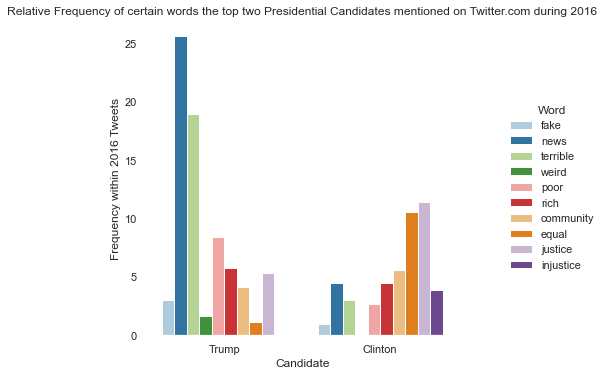

In [113]:
#Adjusting the font size
plt.rcParams.update({'font.size': 18})
sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor' : 'white'})

#Making a factorplot using the relative frequency data divded by candidate and labeled/Colored by the Word
sns_plot = sns.factorplot(data = sum_dataframe_melted, x='Candidate', y='Frequency within 2016 Tweets', hue='Word', kind='bar', palette="Paired")
#Applying Title
plt.title('Relative Frequency of certain words the top two Presidential Candidates mentioned on Twitter.com during 2016')
#Saving Figure
sns_plot.savefig("Relative Frequency Of Certain Tweets - Clinton and Trump 2016")

In response to giving details on a potential project (final for CSS 100)

##### Question 3
* 3a
    * What will meat consumption for the Unites States (or world, still deciding) look like in the future?
* 3b
    * I will be using two forms of datasets acquired through Kaggle.com from user's Vagif Aliyev
    (data taken from OECD agriculture statistics) and Michael Scott (data taken from indexmundi's global meat price indicator).
    I've thought about using data from only the United States, but unfortunately the meat price index does not involve consumer-based
    spending on the product, only the value indicated of what could be made in retail supermarkets (USDA source). This means that sales of the
    actual meat would not be accurate to what people spend, only on what markets spend for supply. This is also why I chose the
    global meat consumption instead, which would better track consumer's reactions to beef prices. Indexmundi does not provide
    individual price indexes per country, only globally (incorporates trade agreements from all countries).
* 3c
    *I hope to use a simple linear regression model to predict a trend on the price of beef, poultry, and pork within the united states, which when
    correlated with the consumption of meat, should predict where our meat consumption should be. Linear regression also allows a prediction past the given y
    axis, which means if it lowers or raises past that of the past, it should catch it.
* 3e
    *The other form of machine learning I hope to use k-means clustering, as the
    multiple countries can provide useful dimensionality of the data to see if there are any groups forming due to the prices. It would be difficult as there
    are very few documents per country available (less days, more by year which also limits prescision). Plus this would be better for more categorical analysis
    rather than hard predictive analysis. I have the data for x and y, but no defined categories. Maybe the clusters that appear might change my approach. If
    they even change
* 3d
    * To be absolutely honest, I have no idea. I've never had a project this diverse and untethered in scope. Usually projects give me some form of
    topic to follow or preset topics to pick, so this will be very difficult, a lot of procrastination will take place. I defintely could tie meat consumption
    with the social implications of how society views vegetarians, as I would assume that the more expensive meat becomes, the more vegetarians would exist, and the
    more likely they would be accepted by general society. I could see support for environmental concerns going up if the price of meat rises and accompanying consumption
    of meat, if that actually happens. Or maybe the trends I see in the regression show that meat consumption is lowering in spite of population increases. Maybe
    the economy of a certain country is what dictates meat consumption, and we can predict their economy using this meat price method without even looking at
    a country's GDP. I don't think I'll feel comfortable using this paper for a writing sample for grad school as I know I'm going to hold this project off
    until I rush through it, but I would definitely share it with others including the code so that more people can have a chance to build on the rough
    structure I made off of the datasets. I am excited to see what happens once I view the Linear Regression model, will it show an increase in consumption, or a
    decrease?